<a href="https://colab.research.google.com/github/pscabral/IFMA_Softex/blob/main/CNNVGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset

Cloning into 'Fruit-Images-Dataset'...
remote: Enumerating objects: 385858, done.
remote: Counting objects: 100% (8693/8693), done.
remote: Compressing objects: 100% (8659/8659), done.
remote: Total 385858 (delta 37), reused 8688 (delta 34), pack-reused 377165
Receiving objects: 100% (385858/385858), 2.10 GiB | 36.06 MiB/s, done.
Resolving deltas: 100% (1197/1197), done.
Updating files: 100% (90503/90503), done.


In [2]:
import matplotlib.pyplot as plt
from glob import glob

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

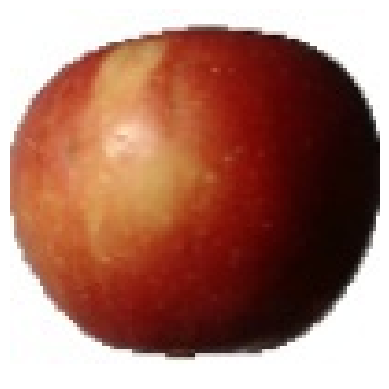

In [3]:
train_path = "../content/Fruit-Images-Dataset/Training"
test_path = "../content/Fruit-Images-Dataset/Test"
# a sample apple braeburn image

img = load_img(train_path + "/Apple Braeburn/0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [4]:
# image matrix shape with rgb
x = img_to_array(img)
x.shape

(100, 100, 3)

In [5]:
# how many classes are there in dataset?
classNames = glob(train_path + "/*")
numberOfClass = len(classNames)
print("The number of class:", numberOfClass)

The number of class: 131


In [6]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output layer
model.add(Activation("softmax"))

In [7]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [8]:
batch_size = 32

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.3,
                   horizontal_flip = True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size = x.shape[:2], batch_size = batch_size, color_mode = "rgb", class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path, target_size = x.shape[:2], batch_size = batch_size, color_mode = "rgb", class_mode = "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [10]:
history = model.fit_generator(generator = train_generator,
                    steps_per_epoch = 1600 // batch_size,
                    epochs = 50,
                    validation_data = test_generator,
                    validation_steps = 800 // batch_size)

<ipython-input-10-21d7cf02f3bc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = train_generator,


Epoch 1/50
50/50 [==============================] - 18s 115ms/step - loss: 4.6964 - accuracy: 0.0269 - val_loss: 4.2437 - val_accuracy: 0.0775
Epoch 2/50
50/50 [==============================] - 6s 128ms/step - loss: 4.1078 - accuracy: 0.0662 - val_loss: 3.5337 - val_accuracy: 0.1425
Epoch 3/50
50/50 [==============================] - 6s 118ms/step - loss: 3.4786 - accuracy: 0.1331 - val_loss: 2.8537 - val_accuracy: 0.2700
Epoch 4/50
50/50 [==============================] - 7s 145ms/step - loss: 2.9568 - accuracy: 0.2231 - val_loss: 2.4207 - val_accuracy: 0.3450
Epoch 5/50
50/50 [==============================] - 5s 106ms/step - loss: 2.4192 - accuracy: 0.3206 - val_loss: 1.7715 - val_accuracy: 0.4925
Epoch 6/50
50/50 [==============================] - 7s 145ms/step - loss: 1.9983 - accuracy: 0.4087 - val_loss: 1.6924 - val_accuracy: 0.5362
Epoch 7/50
50/50 [==============================] - 6s 129ms/step - loss: 1.7633 - accuracy: 0.4781 - val_loss: 1.1108 - val_accuracy: 0.6963
Epoch

In [11]:
#Novo código
history = model.fit(
    x=train_generator,
    steps_per_epoch=1600 // batch_size,
    epochs=50,
    validation_data=test_generator,
    validation_steps=800 // batch_size
)

Epoch 1/50
50/50 [==============================] - 6s 122ms/step - loss: 0.2293 - accuracy: 0.9319 - val_loss: 0.2907 - val_accuracy: 0.9187
Epoch 2/50
50/50 [==============================] - 5s 107ms/step - loss: 0.2224 - accuracy: 0.9306 - val_loss: 0.2446 - val_accuracy: 0.9275
Epoch 3/50
50/50 [==============================] - 7s 147ms/step - loss: 0.2521 - accuracy: 0.9212 - val_loss: 0.1380 - val_accuracy: 0.9550
Epoch 4/50
50/50 [==============================] - 6s 120ms/step - loss: 0.1758 - accuracy: 0.9406 - val_loss: 0.1809 - val_accuracy: 0.9463
Epoch 5/50
50/50 [==============================] - 7s 134ms/step - loss: 0.1858 - accuracy: 0.9456 - val_loss: 0.3113 - val_accuracy: 0.8988
Epoch 6/50
50/50 [==============================] - 7s 136ms/step - loss: 0.2109 - accuracy: 0.9325 - val_loss: 0.3984 - val_accuracy: 0.8950
Epoch 7/50
50/50 [==============================] - 6s 119ms/step - loss: 0.2243 - accuracy: 0.9337 - val_loss: 0.1960 - val_accuracy: 0.9388
Epoch 

In [12]:
def save_model(fileName):
    model.save_weights(fileName + ".h5")

    import json
    with open(fileName + ".json", "w") as f:
        json.dump(history.history, f)

def load_json(fileName):
    import codecs
    import json
    with codecs.open(fileName + ".json", "r", encoding="utf-8") as f:
        h = json.loads(f.read())

    return h

# Descomente estas linhas para salvar e carregar o modelo
save_model("/content/test")
h = load_json("/content/test")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


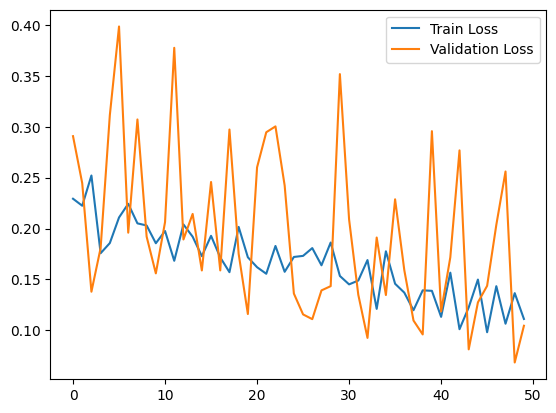

In [13]:
print(history.history.keys())
plt.figure()
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

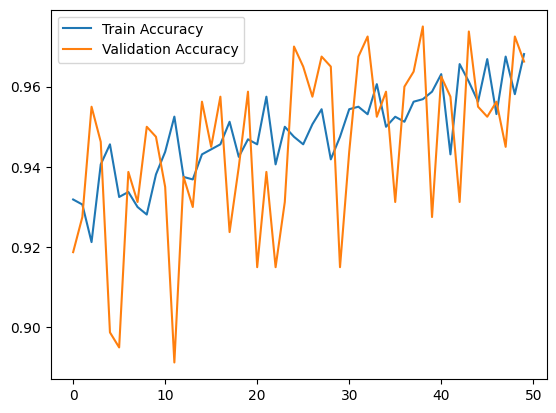

In [14]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

In [15]:
# import vgg16 model from keras library
from keras.applications.vgg16 import VGG16

vgg = VGG16()

553467096/553467096 [==============================] - 3s 0us/step


In [16]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
# all layers of vgg16
vgg_layer_list = vgg.layers
vgg_layer_list

In [18]:
# drop last dense layer that has 1000 class-prediction layers
model = Sequential()
for i in range(len(vgg_layer_list)-3):
    model.add(vgg_layer_list[i])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [19]:
# freeze layers
for layers in model.layers:
    layers.trainable = False

model.add(Dense(4096, activation = "relu"))
model.add(Dense(4096, activation = "relu"))

# adding last layer as a trainable layer
model.add(Dense(numberOfClass, activation = "softmax"))
# last model's summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [20]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [21]:
# re-generate images with (224, 224) target size
train_generator = train_datagen.flow_from_directory(train_path, target_size = (224, 224), batch_size = batch_size, color_mode = "rgb", class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path, target_size = (224, 224), batch_size = batch_size, color_mode = "rgb", class_mode = "categorical")

history = model.fit_generator(generator = train_generator,
                    steps_per_epoch = 1600 // batch_size,
                    epochs = 30,
                    validation_data = test_generator,
                    validation_steps = 800 // batch_size)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


<ipython-input-21-62e96a742e69>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = train_generator,


Epoch 1/30
50/50 [==============================] - 34s 552ms/step - loss: 13.0691 - accuracy: 0.0100 - val_loss: 4.7391 - val_accuracy: 0.0150
Epoch 2/30
50/50 [==============================] - 24s 473ms/step - loss: 4.4979 - accuracy: 0.0400 - val_loss: 4.4484 - val_accuracy: 0.0425
Epoch 3/30
50/50 [==============================] - 27s 541ms/step - loss: 4.1330 - accuracy: 0.0794 - val_loss: 3.8057 - val_accuracy: 0.1075
Epoch 4/30
50/50 [==============================] - 25s 503ms/step - loss: 3.7223 - accuracy: 0.1250 - val_loss: 3.4130 - val_accuracy: 0.1587
Epoch 5/30
50/50 [==============================] - 25s 496ms/step - loss: 3.3495 - accuracy: 0.1663 - val_loss: 2.9488 - val_accuracy: 0.2475
Epoch 6/30
50/50 [==============================] - 26s 517ms/step - loss: 2.9319 - accuracy: 0.2412 - val_loss: 3.0007 - val_accuracy: 0.2525
Epoch 7/30
50/50 [==============================] - 24s 476ms/step - loss: 2.5439 - accuracy: 0.3025 - val_loss: 2.2347 - val_accuracy: 0.373

In [24]:
#novo modelo
history = model.fit(
    x=train_generator,
    steps_per_epoch=1600 // batch_size,
    epochs=30,
    validation_data=test_generator,
    validation_steps=800 // batch_size
)

Epoch 1/30
50/50 [==============================] - 24s 475ms/step - loss: 0.6406 - accuracy: 0.8044 - val_loss: 0.8215 - val_accuracy: 0.7663
Epoch 2/30
50/50 [==============================] - 25s 490ms/step - loss: 0.5673 - accuracy: 0.8175 - val_loss: 0.9178 - val_accuracy: 0.7788
Epoch 3/30
50/50 [==============================] - 24s 477ms/step - loss: 0.6613 - accuracy: 0.7981 - val_loss: 0.3327 - val_accuracy: 0.9000
Epoch 4/30
50/50 [==============================] - 24s 489ms/step - loss: 0.5985 - accuracy: 0.8331 - val_loss: 0.9385 - val_accuracy: 0.7638
Epoch 5/30
50/50 [==============================] - 25s 492ms/step - loss: 0.5461 - accuracy: 0.8325 - val_loss: 1.2657 - val_accuracy: 0.6963
Epoch 6/30
50/50 [==============================] - 25s 501ms/step - loss: 0.6160 - accuracy: 0.8175 - val_loss: 0.8303 - val_accuracy: 0.7613
Epoch 7/30
50/50 [==============================] - 25s 493ms/step - loss: 0.5319 - accuracy: 0.8456 - val_loss: 0.8259 - val_accuracy: 0.7613

In [28]:
#acurácia é a quantidade de acertos do nosso modelo divido pelo total da amostra.

def acuracia (vp,vn,fp,fn):
    return (vp + vn) / (vp + vn+ fp + fn)

#precisão

def precisao (vp,vn,fp,fn):
    return vp / (vp + fp)

#revocação

def revocacao (vp,vn,fp,fn):
    return vp / (vp + fn)

#f1 score

def f1score (vp,vn,fp,fn):
    return 2 * ((precisao * revocacao)/(precisao + revocacao))

print(acuracia(25,40,10,25))

0.65


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


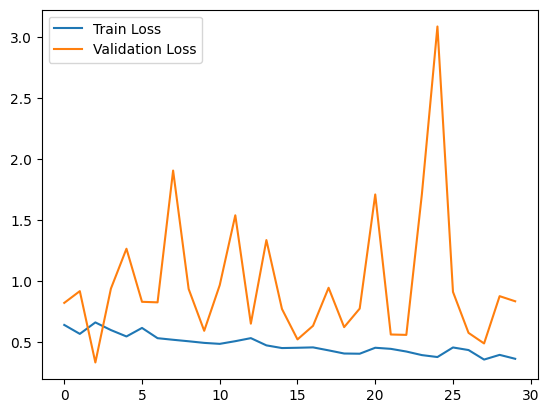

In [25]:
print(history.history.keys())
plt.figure()
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

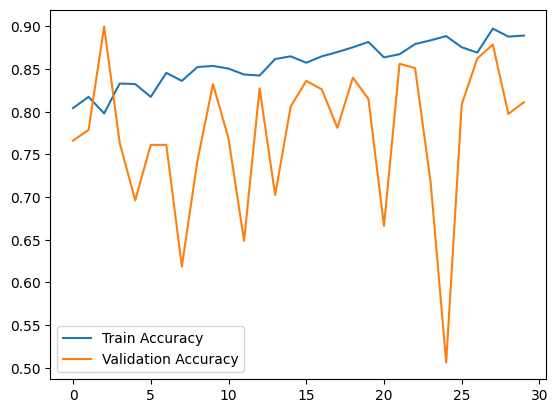

In [26]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

In [27]:
#acurácia é a quantidade de acertos do nosso modelo divido pelo total da amostra.

def acuracia (vp,vn,fp,fn):
    return (vp + vn) / (vp + vn+ fp + fn)

#precisão

def precisao (vp,vn,fp,fn):
    return vp / (vp + fp)

#revocação

def revocacao (vp,vn,fp,fn):
    return vp / (vp + fn)

#f1 score

def f1score (vp,vn,fp,fn):
    return 2 * ((precisao * revocacao)/(precisao + revocacao))

print(acuracia(25,40,10,25))

0.65
